# Seaborn 代码笔记本

In [63]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号'-'显示为方块的问题

In [2]:
sns.__version__ # 查看版本

'0.13.2'

*更新：pip install --upgrade seaborn*

In [3]:
# sns.get_dataset_names() # 查看Seaborn自带的数据集

In [4]:
penguin_df = sns.load_dataset('penguins') # 加载企鹅数据集
penguin_df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [5]:
tip_df = sns.load_dataset('tips')
tip_df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

# 一、查看变量分布

## 1. 箱线图

<Axes: xlabel='bill_length_mm'>

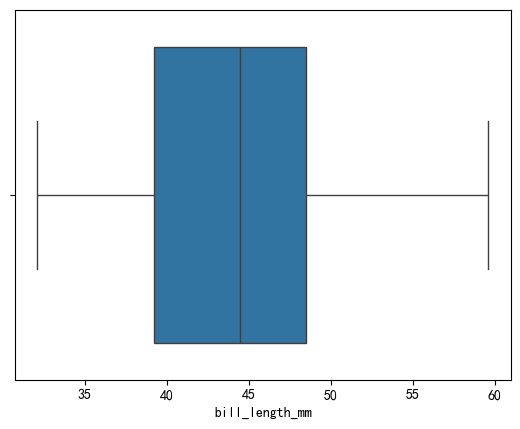

In [6]:
sns.boxplot(data=penguin_df, x="bill_length_mm") # 注意x要=一个特征列

*注意理解箱线图的含义*

- 另一种方法：

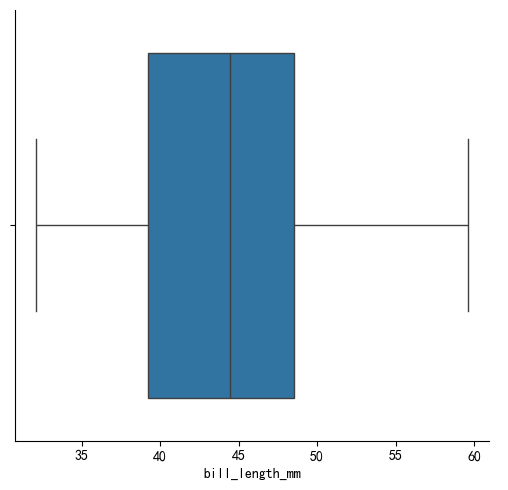

In [7]:
sns.catplot(data=penguin_df, x="bill_length_mm", kind='box')

- 在y轴方向绘制：

<Axes: ylabel='bill_length_mm'>

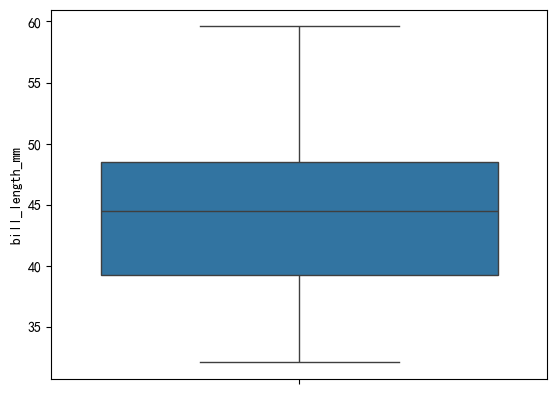

In [8]:
sns.boxplot(data=penguin_df, y="bill_length_mm")

<Axes: >

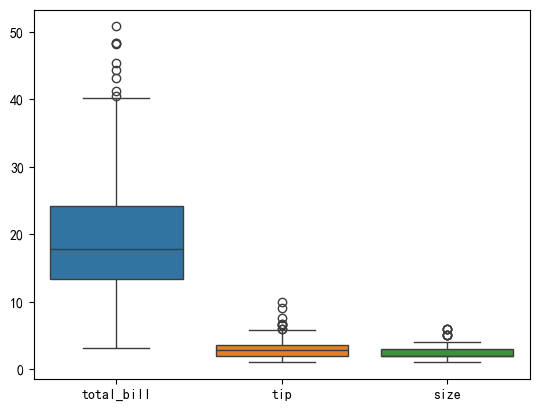

In [9]:
sns.boxplot(data=tip_df) # 画所有特征列的箱线图

## 2. 直方图

- 数值特征

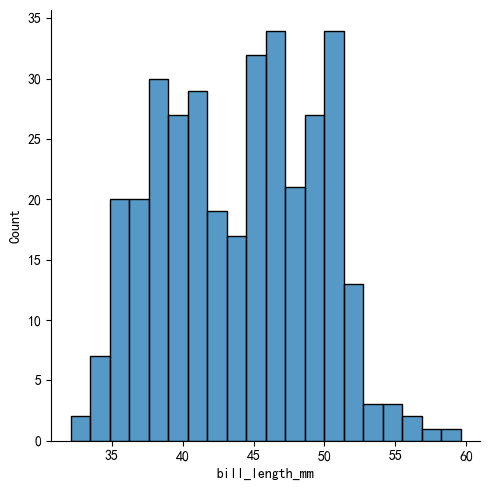

In [10]:
sns.displot(data=penguin_df, x="bill_length_mm", bins=20)

- 类别特征

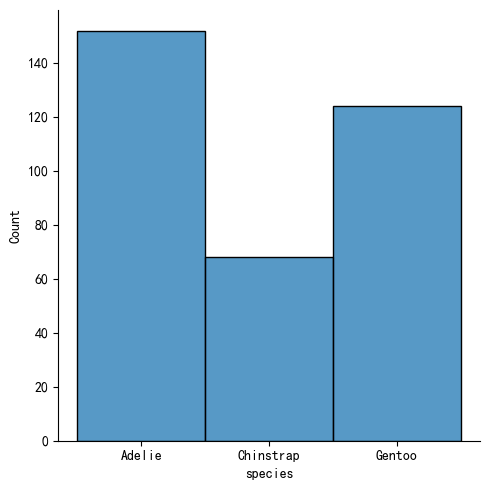

In [11]:
sns.displot(data=penguin_df, x="species")

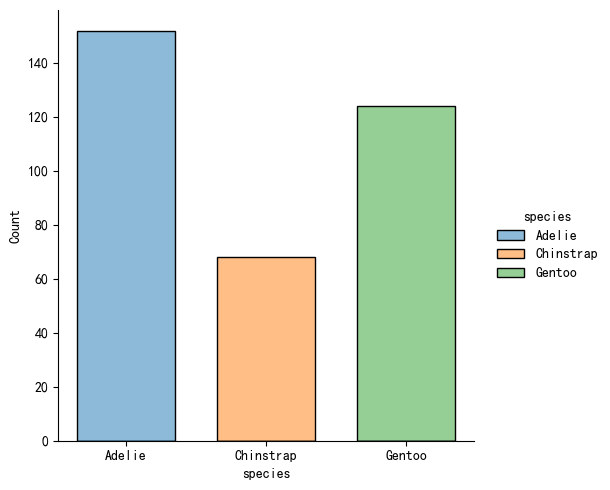

In [12]:
sns.displot(data=penguin_df, x="species", hue="species", shrink=0.7) # 增加细节

- 另一种方法

<Axes: xlabel='species', ylabel='count'>

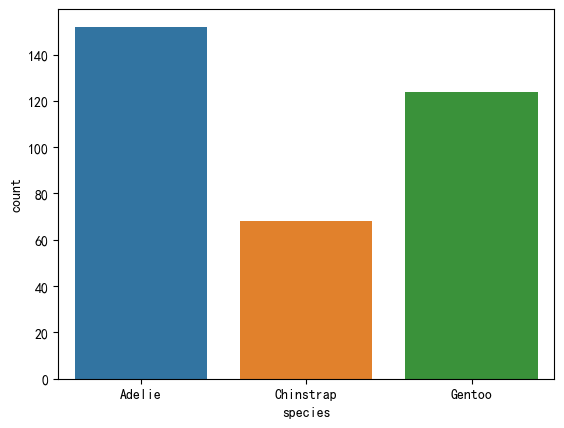

In [13]:
sns.countplot(data=penguin_df, x="species", hue="species")

## 3. KDE曲线

<Axes: xlabel='bill_length_mm', ylabel='Density'>

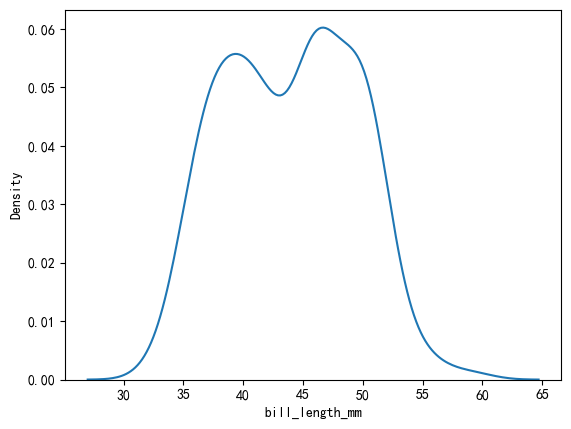

In [14]:
sns.kdeplot(data=penguin_df, x="bill_length_mm")

- 另一种方法：

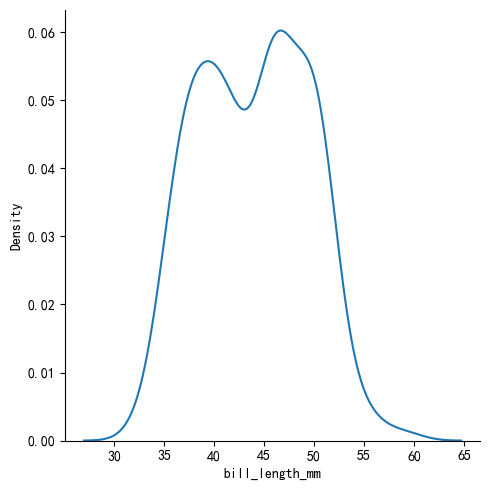

In [15]:
sns.displot(data=penguin_df, x="bill_length_mm", kind="kde")

In [16]:
print(np.min(penguin_df["bill_length_mm"]))
print(np.max(penguin_df["bill_length_mm"]))

32.1
59.6


*kde曲线不合理，30和 60没有取值，曲线却有*

<Axes: xlabel='bill_length_mm', ylabel='Density'>

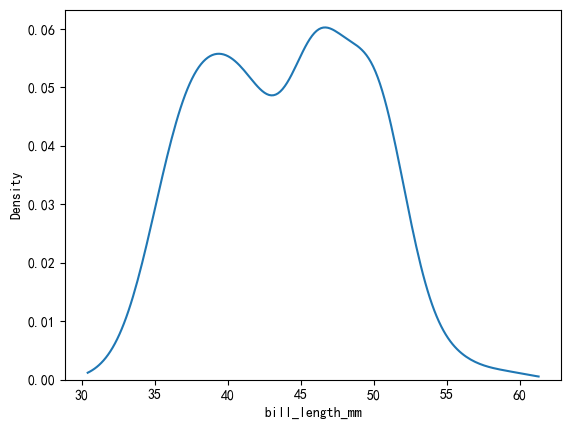

In [17]:
# 解决方法1：
sns.kdeplot(data=penguin_df, x="bill_length_mm", cut=True) # 直接cut掉多余部分

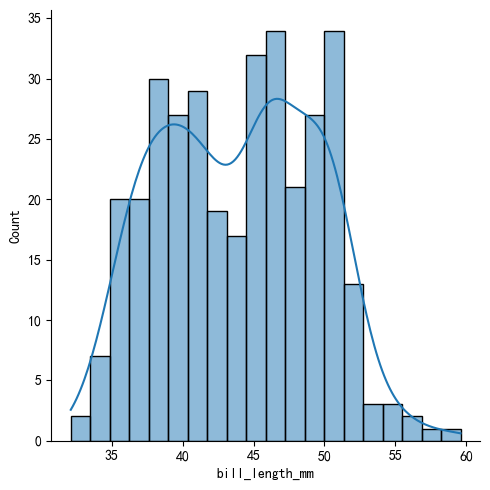

In [18]:
# 解决方法2：
sns.displot(data=penguin_df, x="bill_length_mm", bins=20, kde=True) # 直方图叠加kde曲线

- 添加rugplot

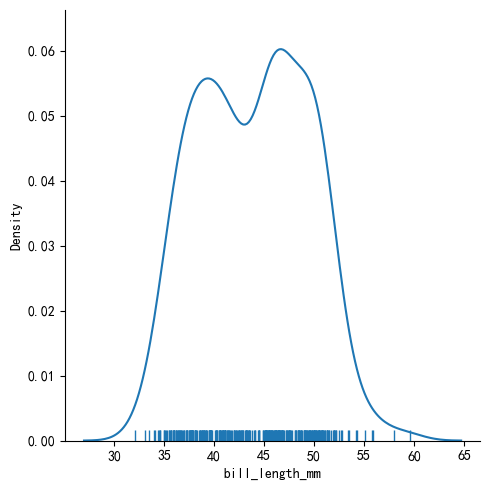

In [19]:
sns.displot(data=penguin_df, x="bill_length_mm", kind="kde", rug=True)

*用于绘制出一维数组中数据点实际的分布位置情况*

- 进阶：

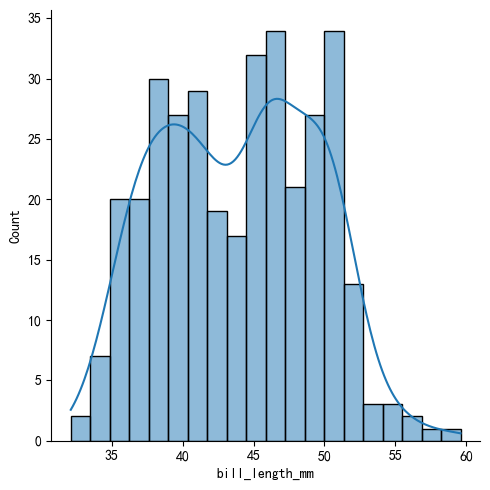

In [20]:
sns.displot(data=penguin_df, x="bill_length_mm", bins=20, kde=True)

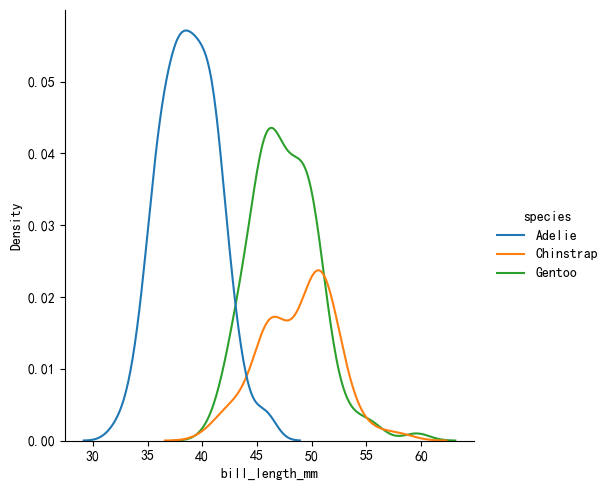

In [21]:
sns.displot(data=penguin_df, x="bill_length_mm", kind="kde", hue="species") # 类别特征kde分析

- 分布有偏移的情况：

In [22]:
diamon_df = sns.load_dataset("diamonds")
diamon_df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

<Axes: xlabel='price'>

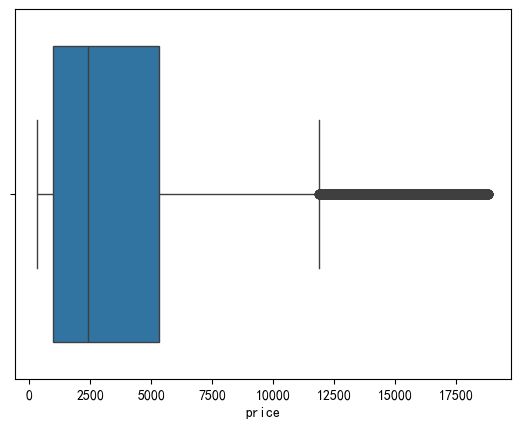

In [23]:
sns.boxplot(data=diamon_df, x="price")

*显然异常值不合理*

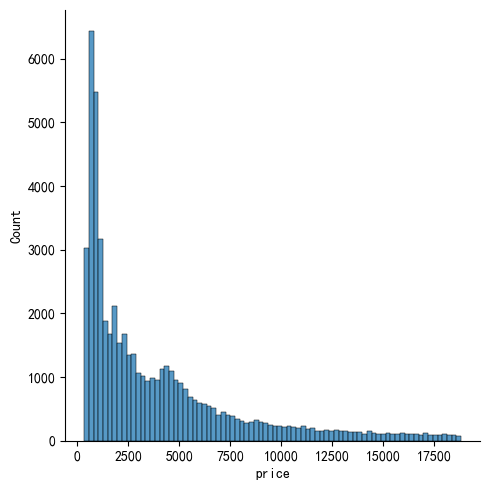

In [24]:
sns.displot(data=diamon_df, x="price")

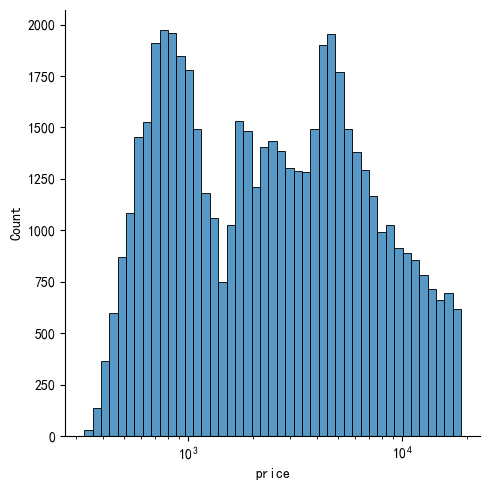

In [25]:
sns.displot(data=diamon_df, x="price", log_scale=True) # x轴取对数处理

- 利用kde曲线查看测试集和训练集的分布是否一致

In [26]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(diamon_df, test_size=0.3, random_state=42)

<Axes: xlabel='depth', ylabel='Density'>

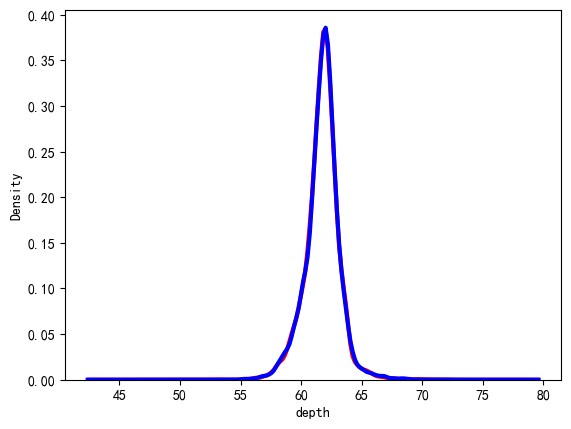

In [27]:
sns.kdeplot(data=train_df, x="depth", linewidth=3.0, color='r') # 第一行可以用displot、kdeplot
sns.kdeplot(data=test_df, x="depth", linewidth=3.0, color='b') # 第二行一定要用kdeplot

*分布一致*

- 类别特征组合
    - FacetGrid特性
    - 探究特征之间的类别分布差别

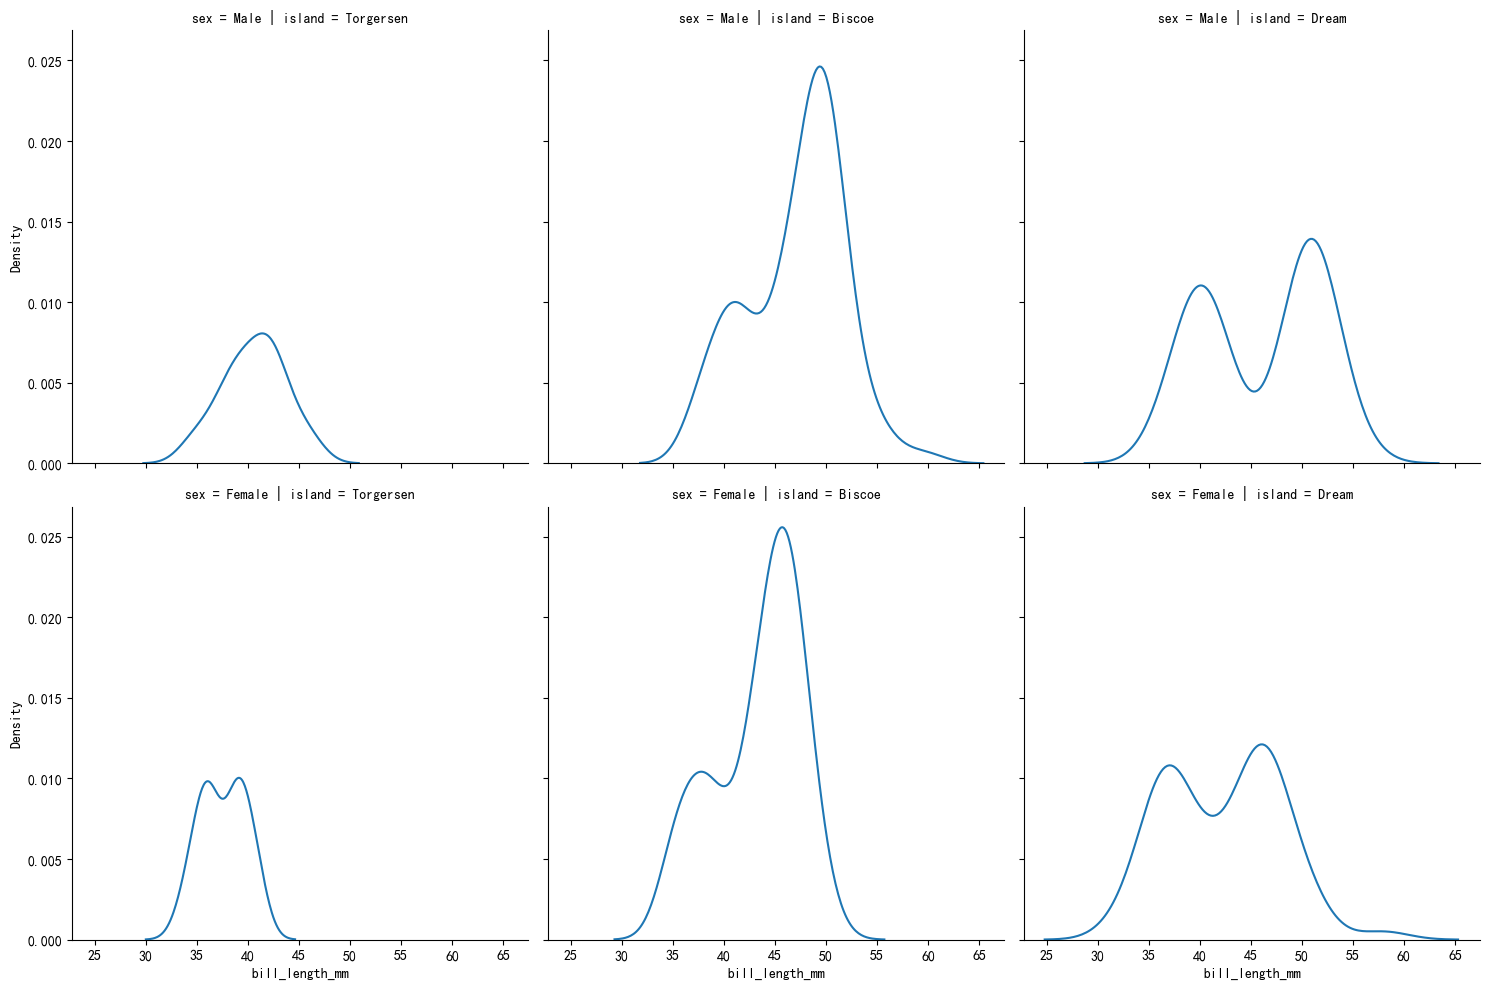

In [28]:
sns.displot(data=penguin_df, x="bill_length_mm", row="sex", col='island', kind='kde')

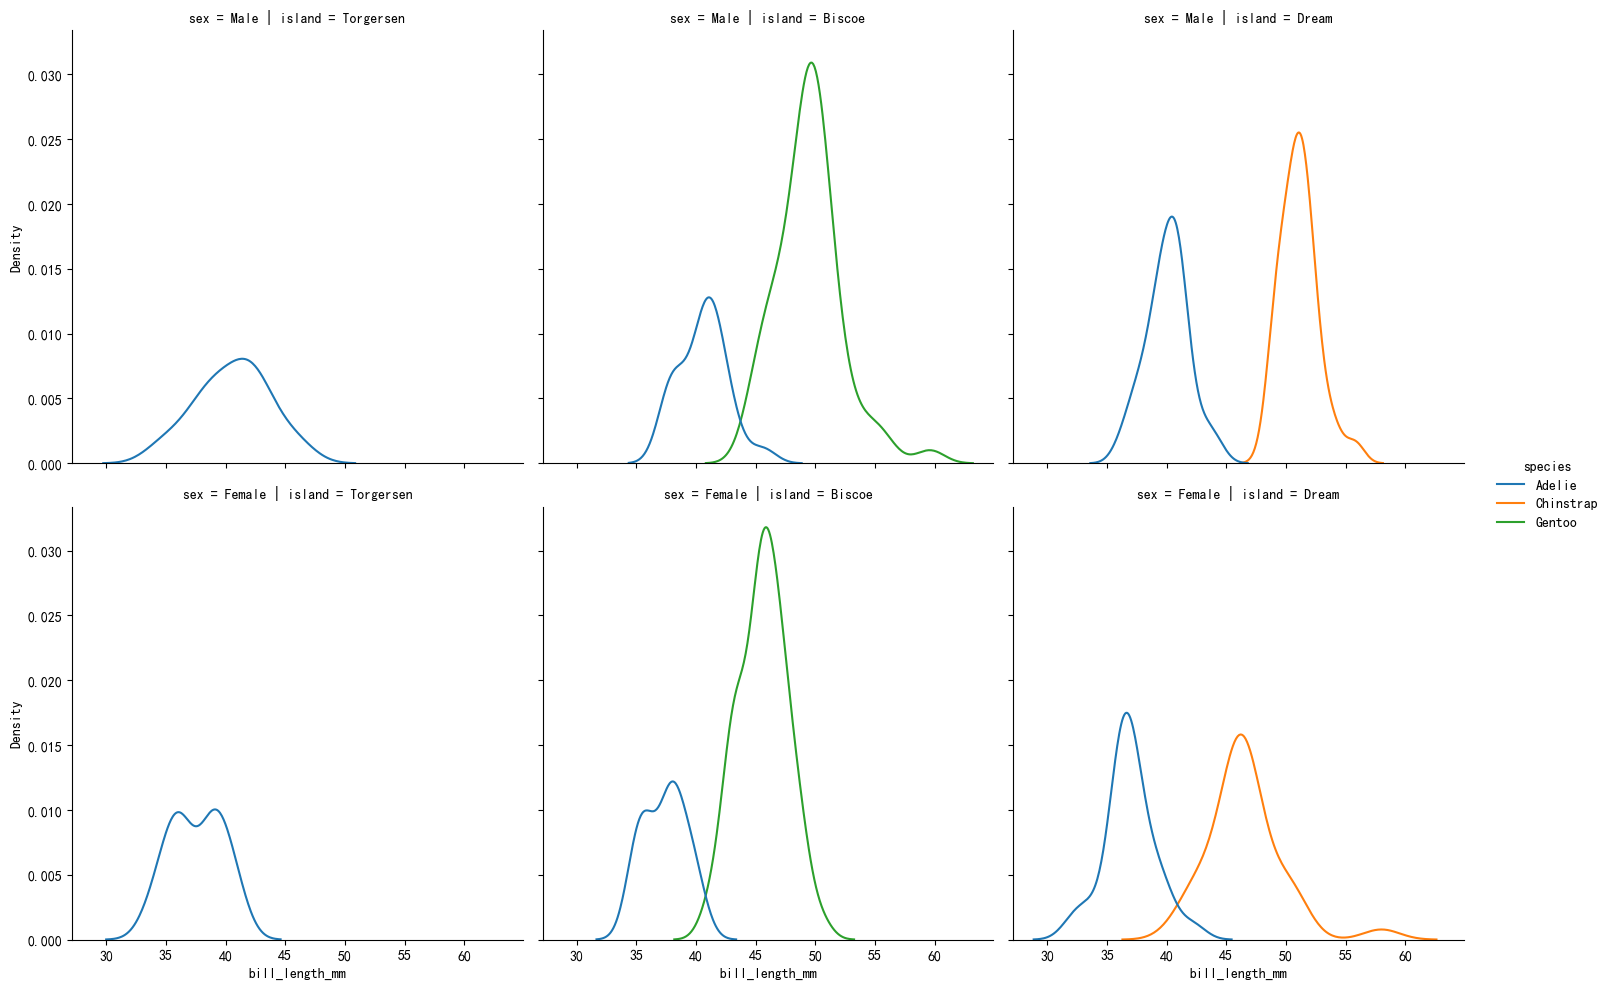

In [29]:
sns.displot(data=penguin_df, x="bill_length_mm", row="sex", col='island', hue="species", kind='kde')

## 4. ECDF曲线

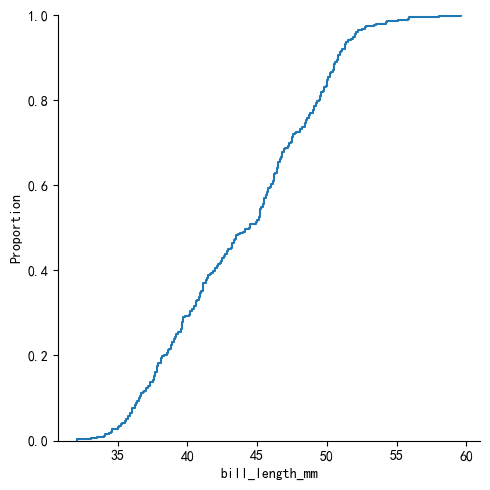

In [30]:
sns.displot(data=penguin_df, x="bill_length_mm", kind='ecdf')

# 二、数值变量关系分析

## 1. 散点图

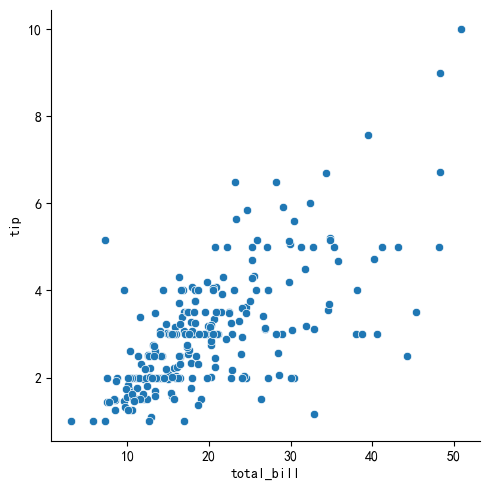

In [31]:
sns.relplot(data=tip_df, x="total_bill", y="tip")

- 增加细节

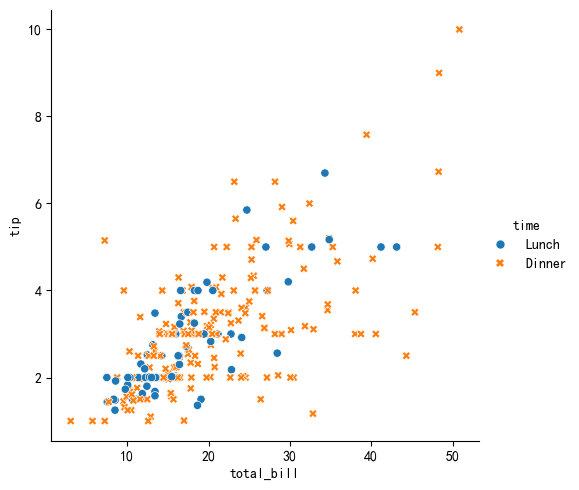

In [32]:
sns.relplot(data=tip_df, x="total_bill", y="tip", hue="time", style="time")

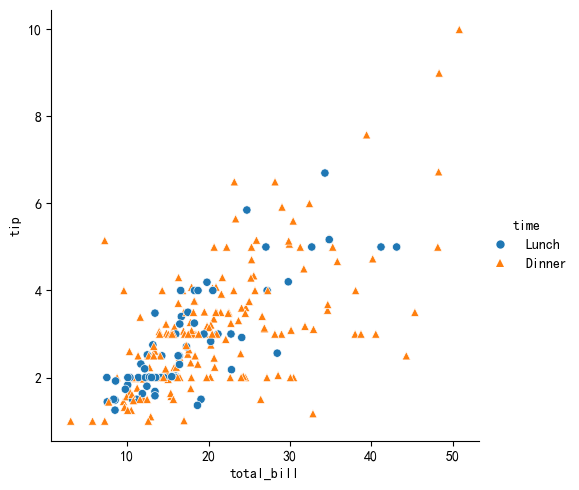

In [33]:
sns.relplot(data=tip_df, x="total_bill", y="tip", hue="time", style="time", markers=["o", "^"]) # 用圆形、三角形表示

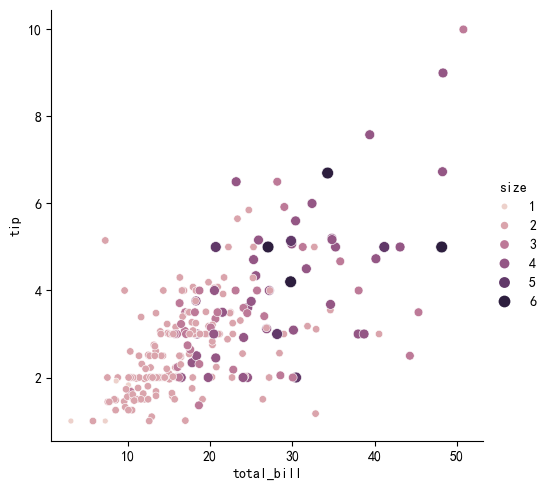

In [34]:
sns.relplot(data=tip_df, x="total_bill", y="tip", hue="size", size="size") # hue=按照数值型特征分类，size=设置标注图形大小

- FacetGrid特性

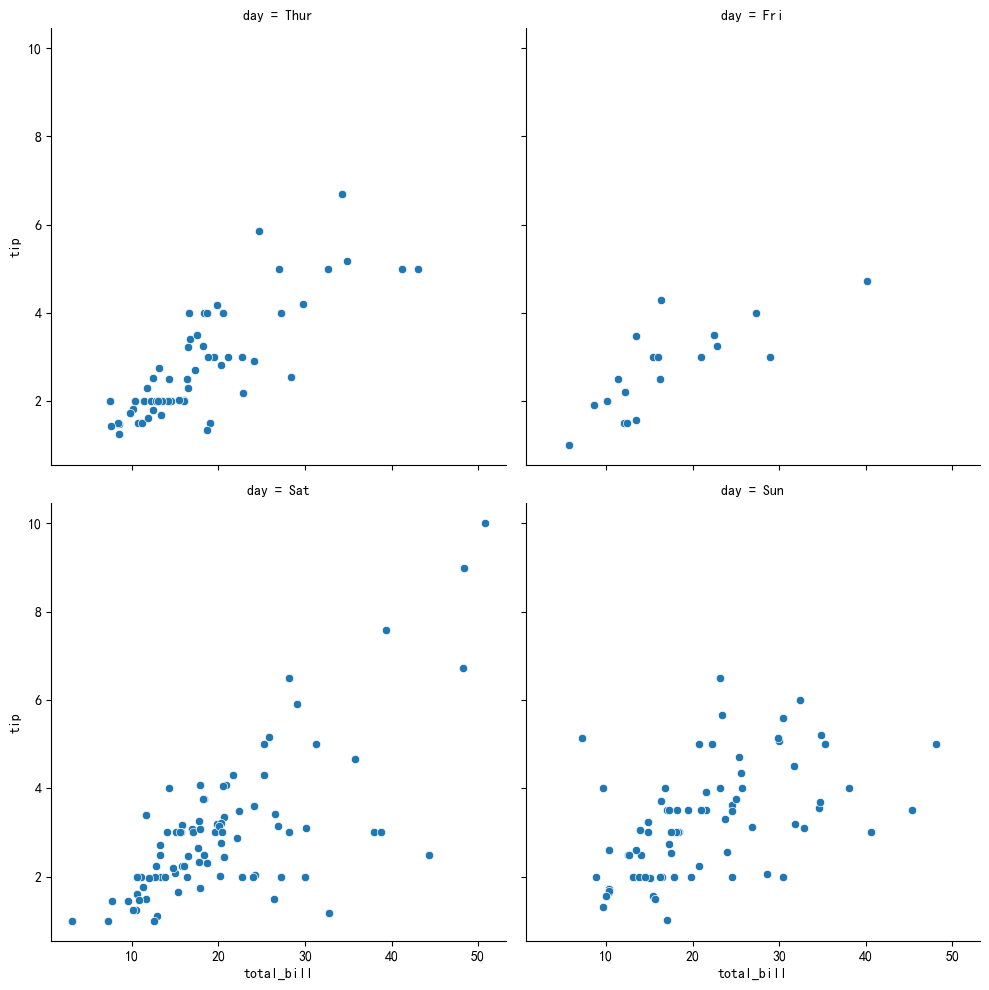

In [35]:
sns.relplot(data=tip_df, x="total_bill", y="tip", col="day", col_wrap=2) # 太多了，col_wrap设置只画两列

## 2. 折线图

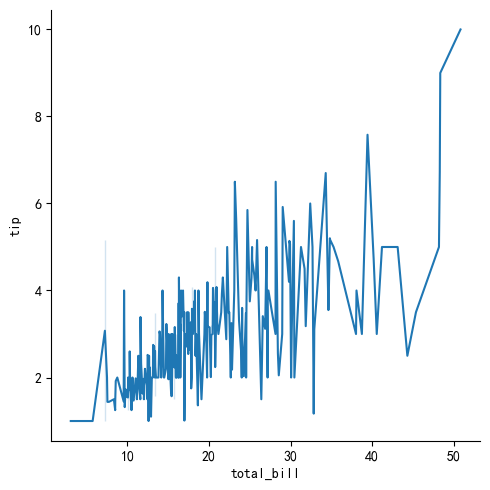

In [36]:
sns.relplot(data=tip_df, x="total_bill", y="tip", kind="line")

- 模拟股票涨跌

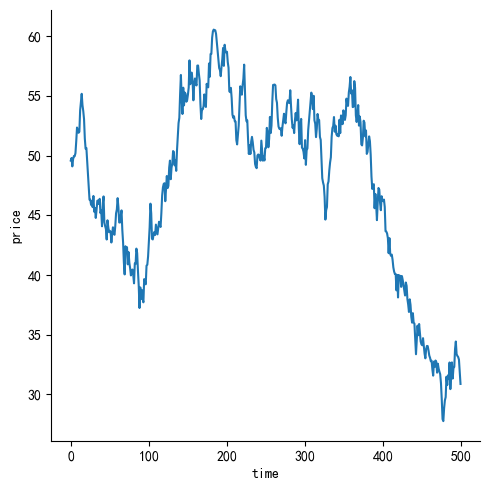

In [37]:
stock_df=pd.DataFrame(dict(time=np.arange(500),price=np.random.randn(500).cumsum()+np.ones(500)*50))
sns.relplot(data=stock_df,x="time",y="price",kind="line")

## 3. 回归拟合

- 方法1

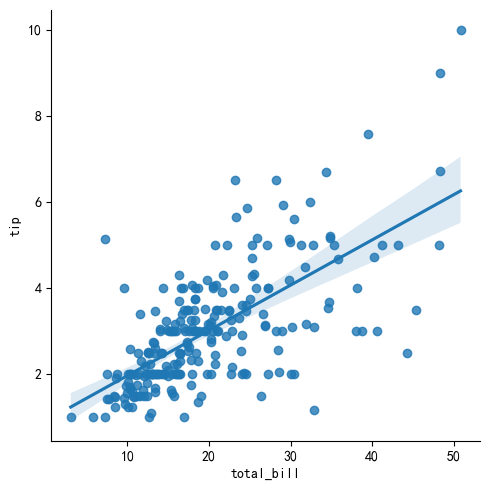

In [38]:
sns.lmplot(data=tip_df, x="total_bill", y="tip")

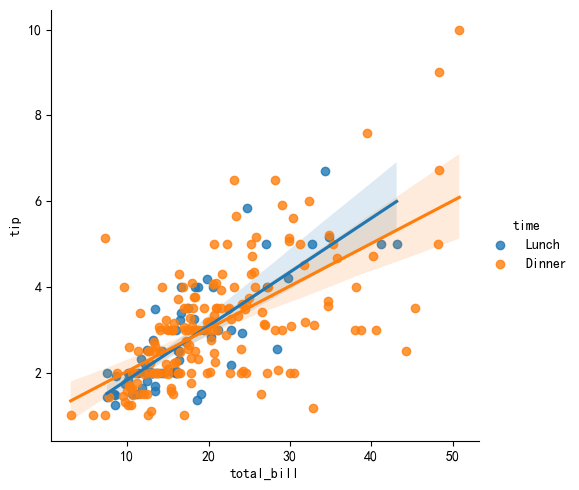

In [42]:
sns.lmplot(data=tip_df, x="total_bill", y="tip", hue="time")

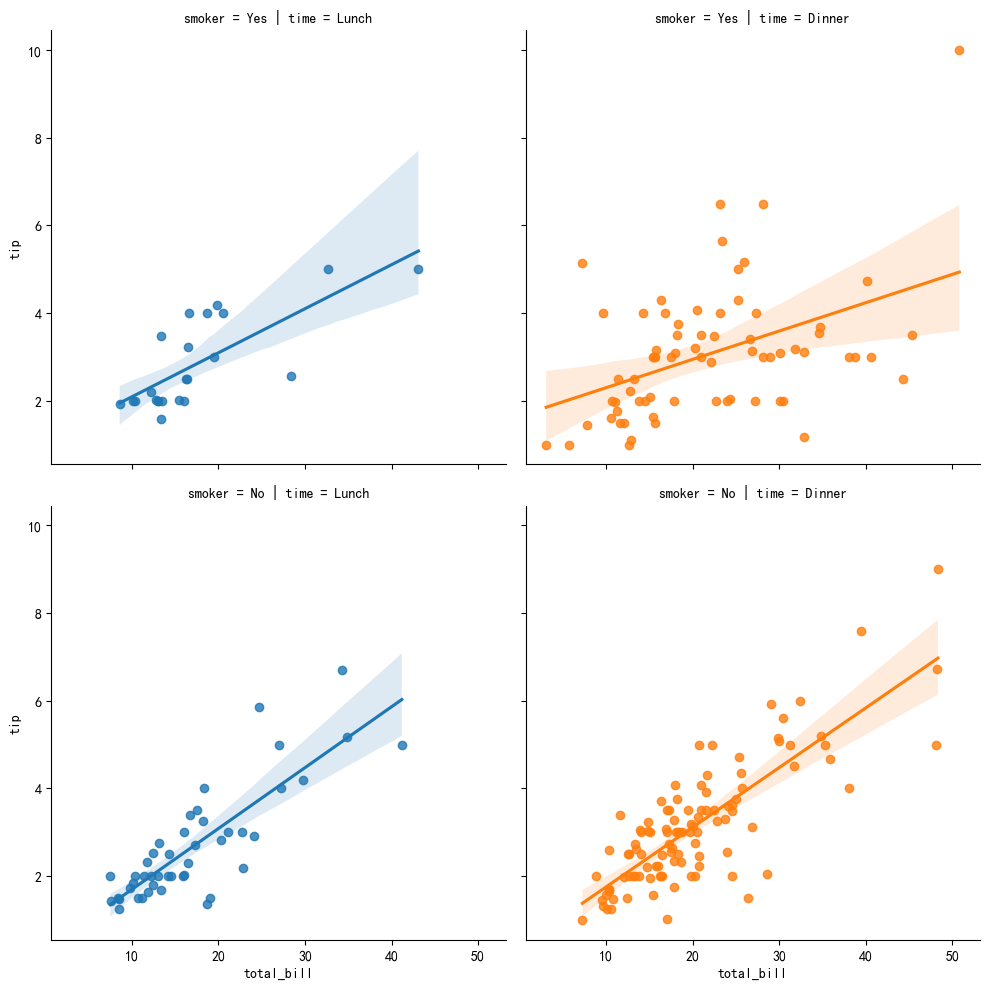

In [43]:
sns.lmplot(data=tip_df, x="total_bill", y="tip", hue="time", row="smoker", col="time")

- 方法2

<Axes: xlabel='total_bill', ylabel='tip'>

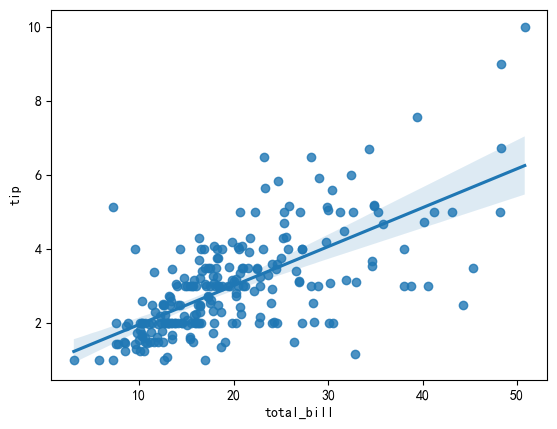

In [39]:
sns.regplot(data=tip_df, x="total_bill", y="tip")

- 画残差：

<Axes: xlabel='total_bill', ylabel='tip'>

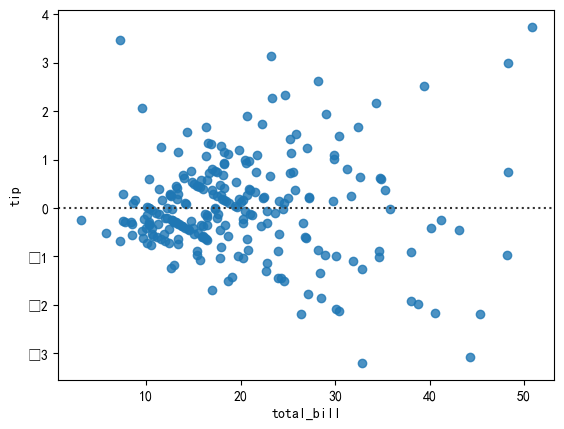

In [41]:
sns.residplot(data=tip_df, x="total_bill", y="tip")

*如果拟合得好，残差呈随机分布，这里的图拟合得不好*

## 4. 联合分布

- 数值型特征

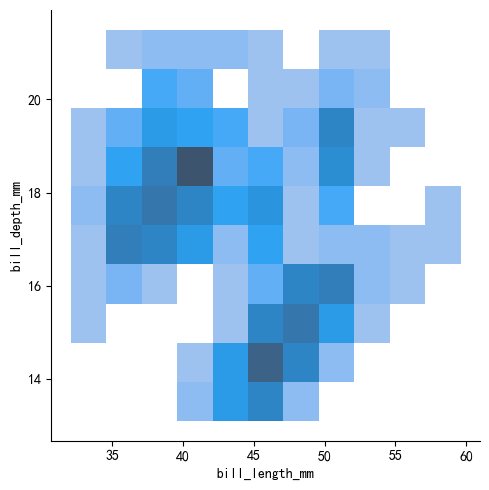

In [44]:
sns.displot(data=penguin_df, x="bill_length_mm", y="bill_depth_mm")

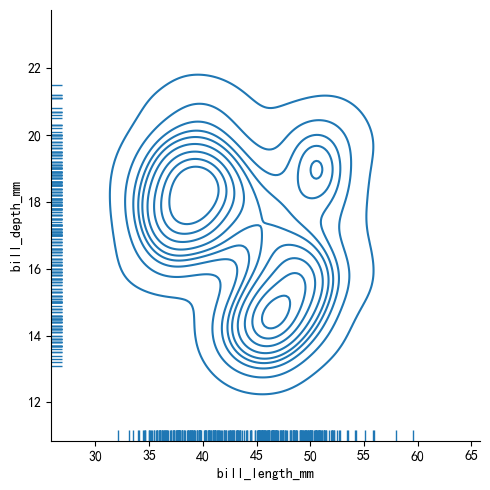

In [ ]:
sns.displot(data=penguin_df, x="bill_length_mm", y="bill_depth_mm", kind='kde', rug=True) # kde形式，叠加rug

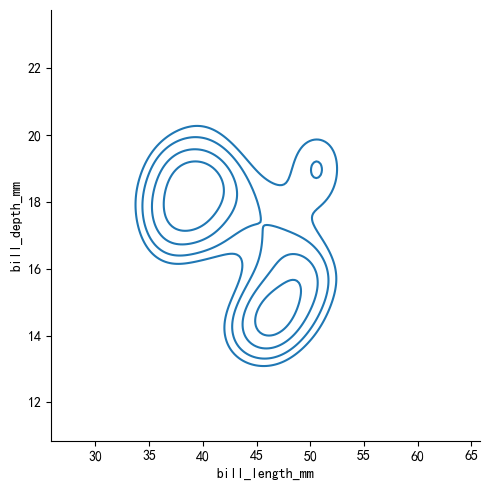

In [55]:
sns.displot(data=penguin_df, x="bill_length_mm", y="bill_depth_mm", kind='kde', thresh=0.3, levels=5) 
# thresh阈值，低于该阈值的区域会被忽略，高于该阈值的区域会被绘制；levels越小越稀疏

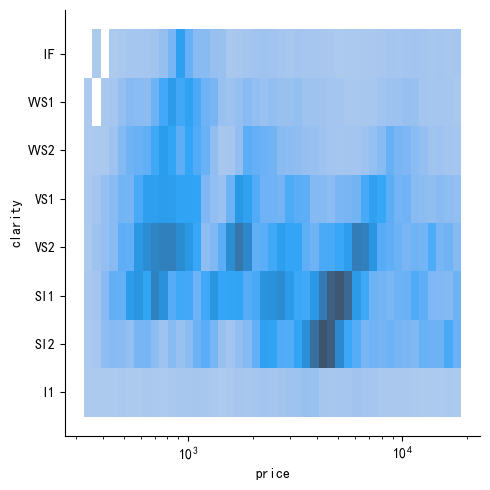

In [ ]:
sns.displot(data=diamon_df, x="price", y="clarity", log_scale=[True, False]) # 只对x轴做对数变换

- 类别型特征

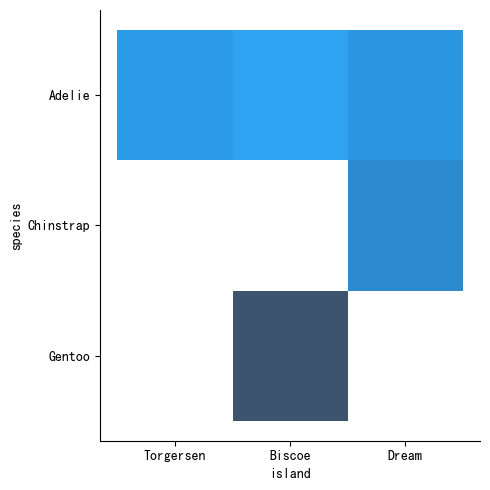

In [58]:
sns.displot(data=penguin_df, x="island", y="species")

## 5. 联合分布+各自分布

- 成对变量

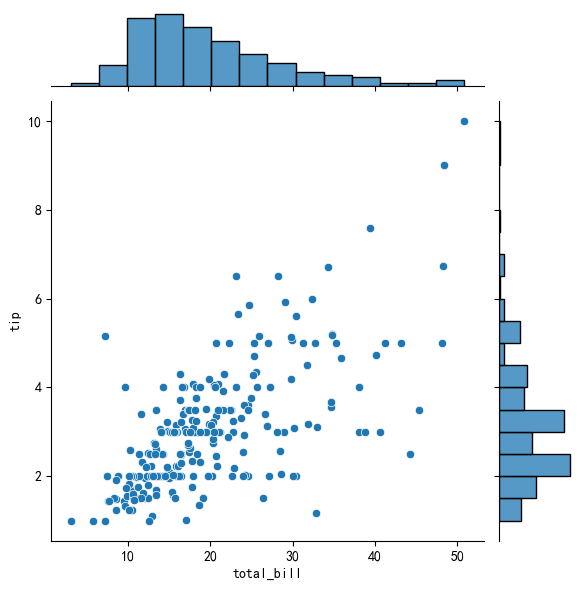

In [ ]:
# kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }
sns.jointplot(data=tip_df, x="total_bill", y="tip")

*中间是联合分布，边缘是各自分布*

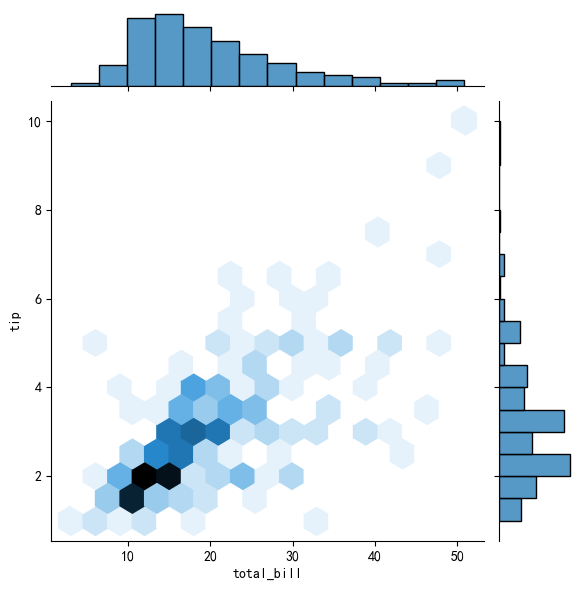

In [66]:
# kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }
sns.jointplot(data=tip_df, x="total_bill", y="tip", kind='hex')

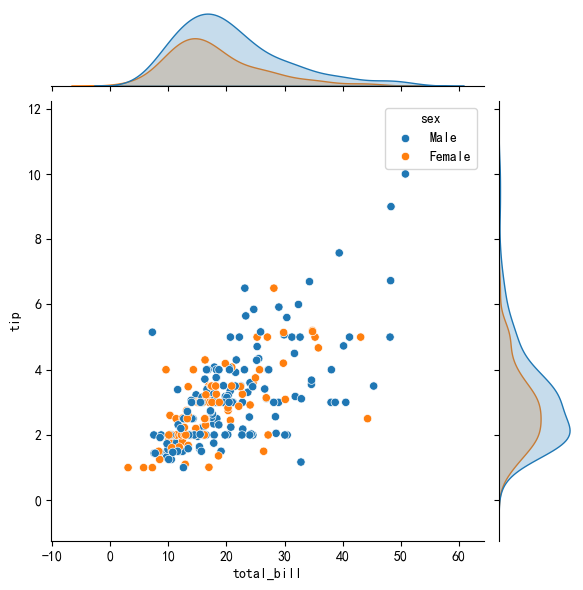

In [ ]:
sns.jointplot(data=tip_df, x="total_bill", y="tip", hue="sex")

- 类别型特征

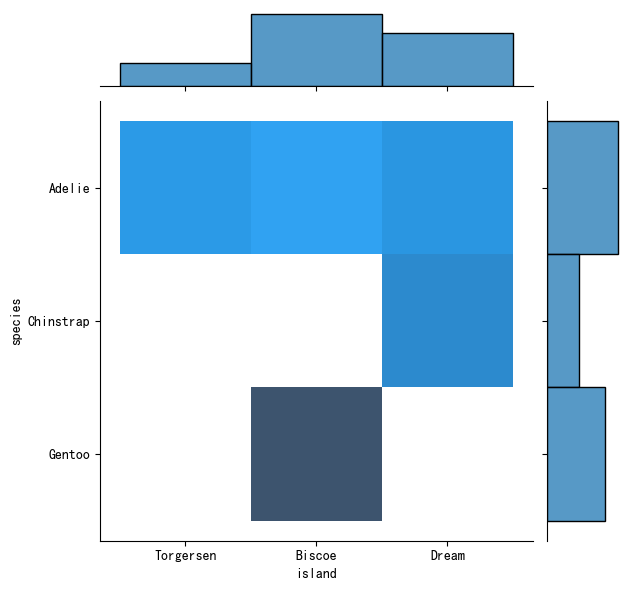

In [ ]:
sns.jointplot(data=penguin_df, x="island", y="species", kind="hist")

- jointplot的升级版：JointGrid，可通过g.plot()自定义函数

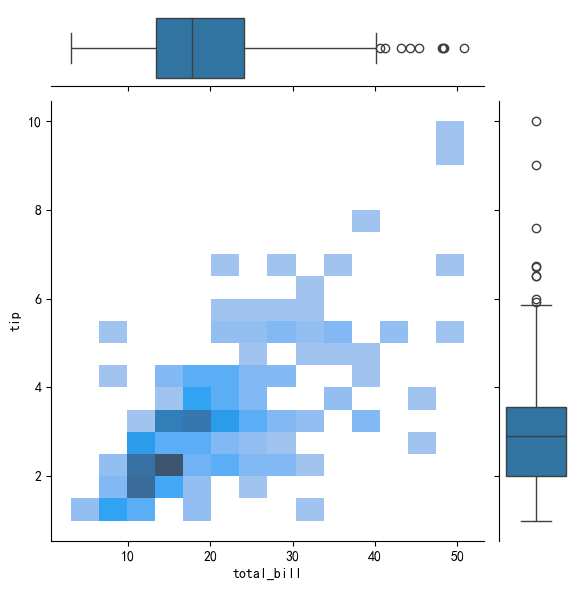

In [ ]:
g=sns.JointGrid(data=tip_df, x="total_bill", y="tip")
g.plot(sns.histplot, sns.boxplot)

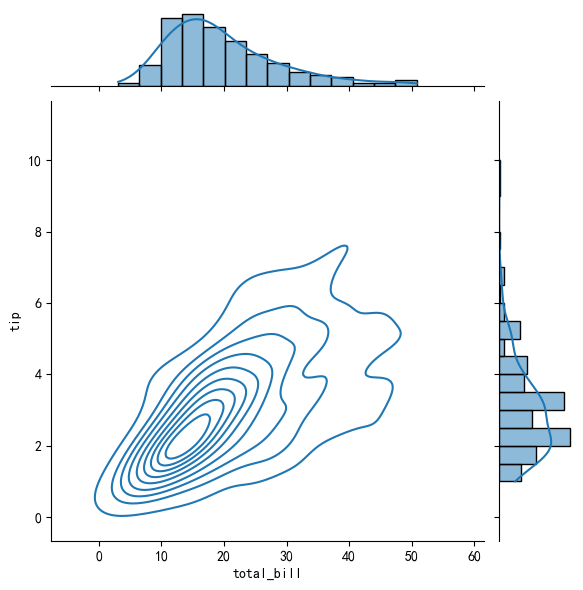

In [ ]:
g = sns.JointGrid(data=tip_df, x="total_bill", y="tip")
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.histplot, kde=True)

- 所有变量

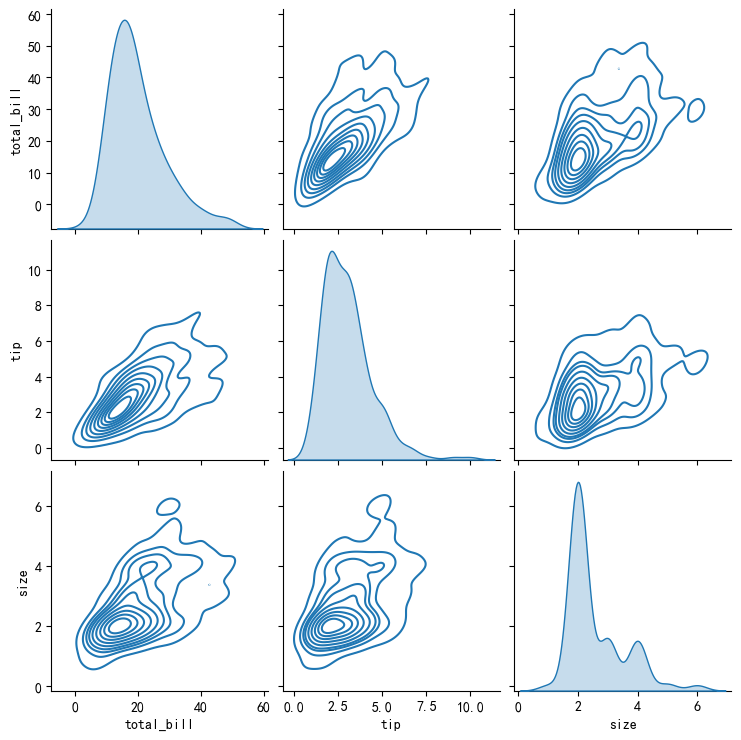

In [75]:
#kind : {'scatter', 'kde', 'hist', 'reg'}
sns.pairplot(data=tip_df, kind='kde')

In [ ]:
#加载car_crashes数据集
car_df = sns.load_dataset("car_crashes")
car_df.head()

total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA

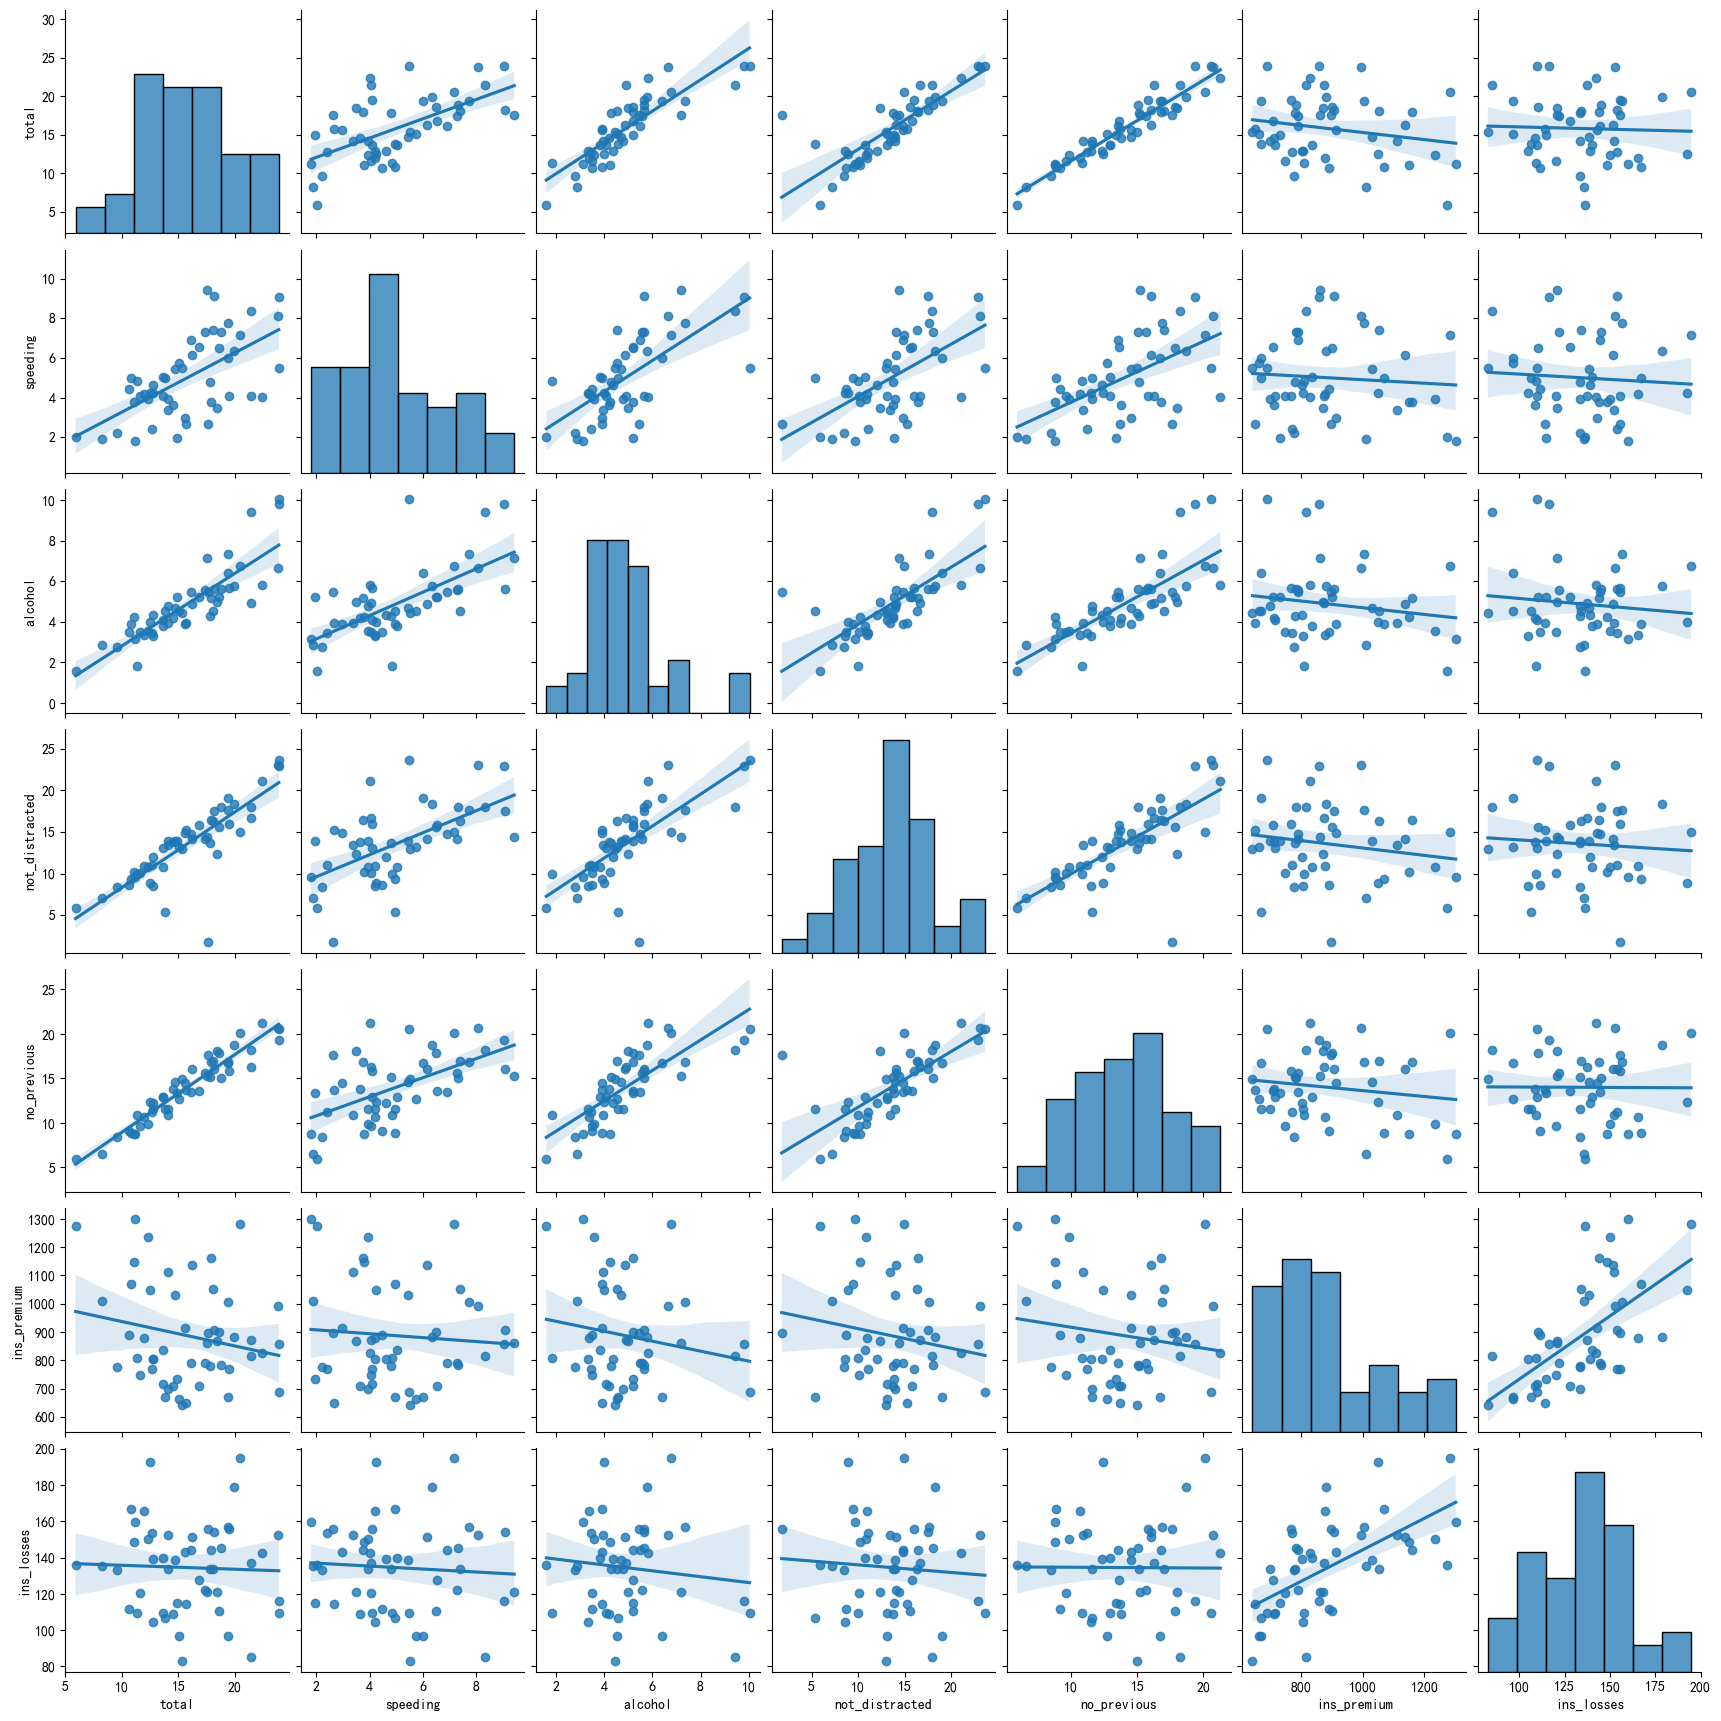

In [77]:
sns.pairplot(data=car_df,kind="reg")

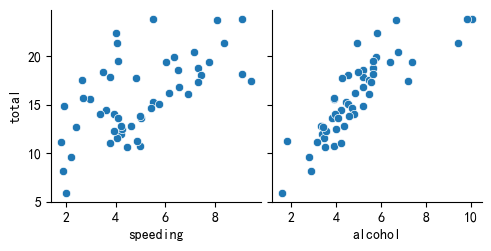

In [ ]:
sns.pairplot(data=car_df, x_vars=["speeding","alcohol"], y_vars=["total"])

- pairplot的升级版：PairGrid，可通过g.map()自定义绘制函数

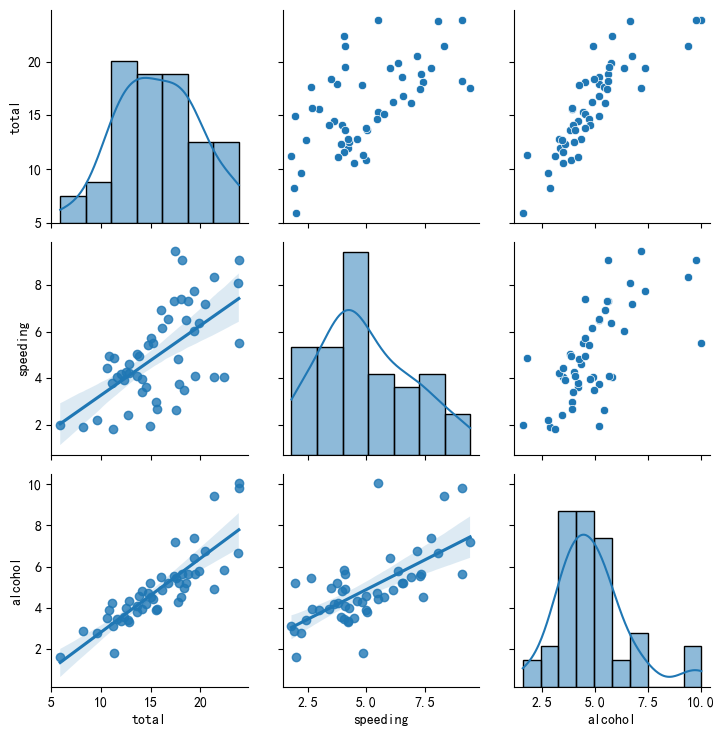

In [ ]:
g = sns.PairGrid(data=car_df, x_vars=["total","speeding","alcohol"], y_vars=["total","speeding","alcohol"])
g.map_upper(sns.scatterplot) # 上三角的图像形状
g.map_diag(sns.histplot, kde=True) # 对角线的图像形状
g.map_lower(sns.regplot) # 下三角的图像形状

## 6. 相关系数
- 热力图

In [ ]:
car_df = car_df.iloc[:, :-1] # 去掉最后一列类别特征（字符串）
car_cor=car_df.corr() # 求两两特征的相关系数
car_cor

total  speeding   alcohol  not_distracted  no_previous  \
total           1.000000  0.611548  0.852613        0.827560     0.956179   
speeding        0.611548  1.000000  0.669719        0.588010     0.571976   
alcohol         0.852613  0.669719  1.000000        0.732816     0.783520   
not_distracted  0.827560  0.588010  0.732816        1.000000     0.747307   
no_previous     0.956179  0.571976  0.783520        0.747307     1.000000   
ins_premium    -0.199702 -0.077675 -0.170612       -0.174856    -0.156895   
ins_losses     -0.036011 -0.065928 -0.112547       -0.075970    -0.006359   

                ins_premium  ins_losses  
total             -0.199702   -0.036011  
speeding          -0.077675   -0.065928  
alcohol           -0.170612   -0.112547  
not_distracted    -0.174856   -0.075970  
no_previous       -0.156895   -0.006359  
ins_premium        1.000000    0.623116  
ins_losses         0.623116    1.000000

<Axes: >

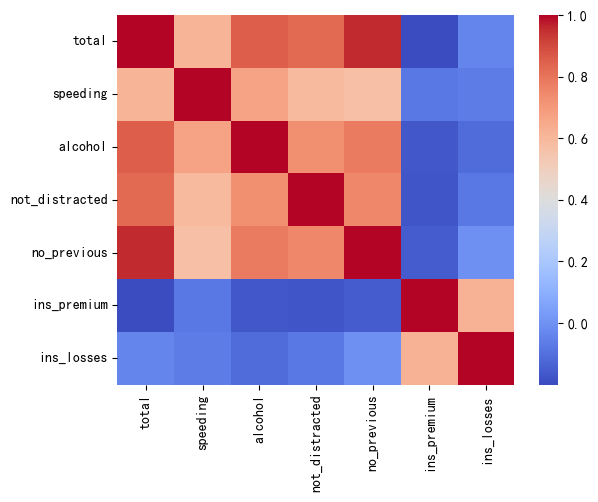

In [ ]:
sns.heatmap(car_cor,cmap="coolwarm") # 画热力图，红色或蓝色越深相关系数越大

<Axes: >

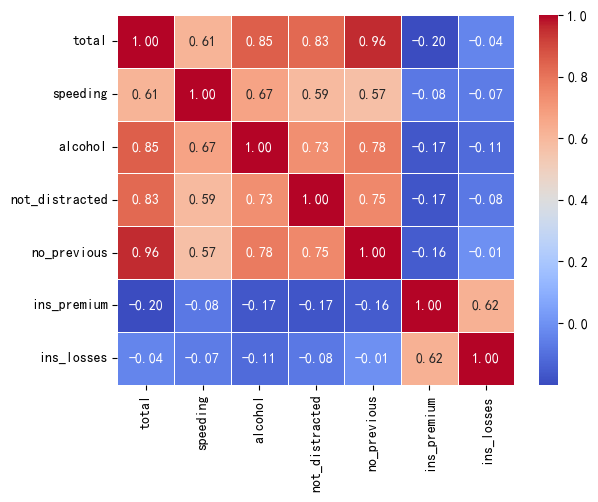

In [ ]:
sns.heatmap(car_cor, cmap="coolwarm", annot=True, fmt=".2f", linewidth=0.5) # linewidth格子间隔，annot=True显示数值，fmt=".2f"数字格式（小数点后两位）

# 三、类别变量分析

## 1. 类别变量分布

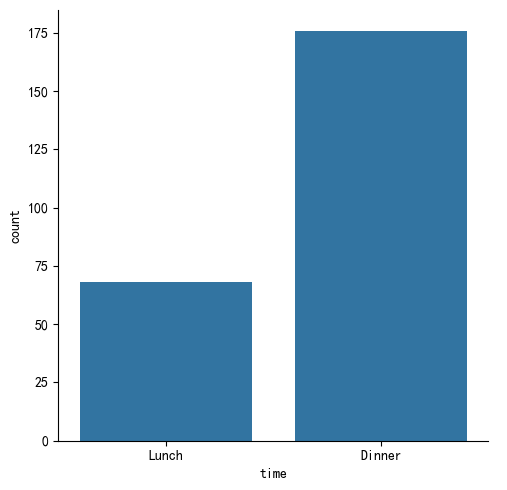

In [88]:
sns.catplot(data=tip_df, x="time", kind="count")

## 2. 类别变量与数值变量的关系

- 不同类别中数值变量的均值/中位数估计

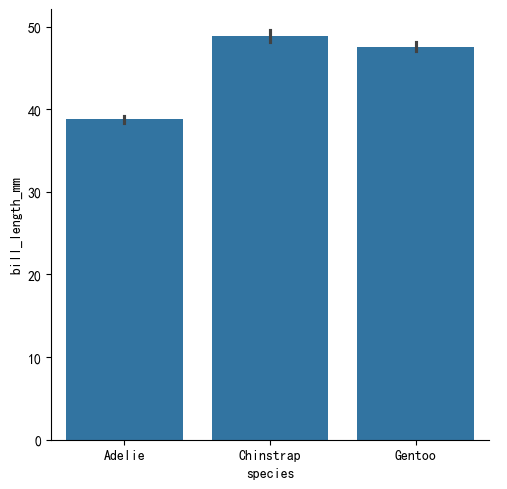

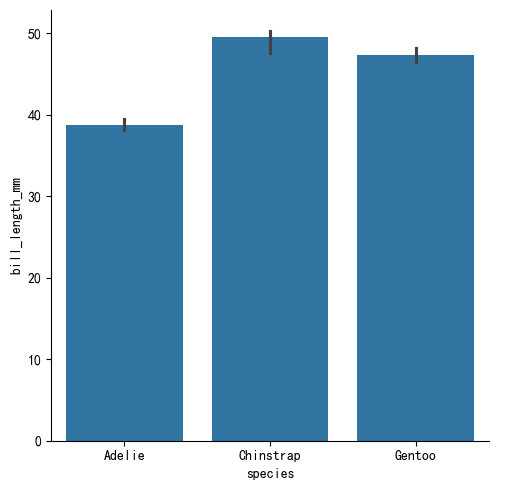

In [ ]:
sns.catplot(data=penguin_df, x="species", y="bill_length_mm", kind="bar") # 均值
sns.catplot(data=penguin_df, x="species", y="bill_length_mm", kind="bar", estimator=np.median) # 中位数

- 点图：

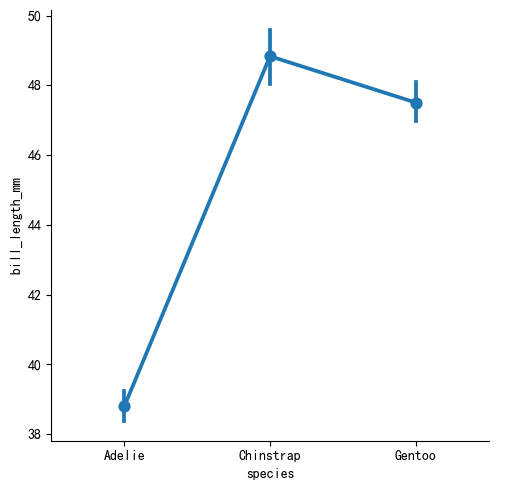

In [ ]:
sns.catplot(data=penguin_df, x="species", y="bill_length_mm",kind="point")

*与上图纵轴间隔不同*

- FacetGrid特性：

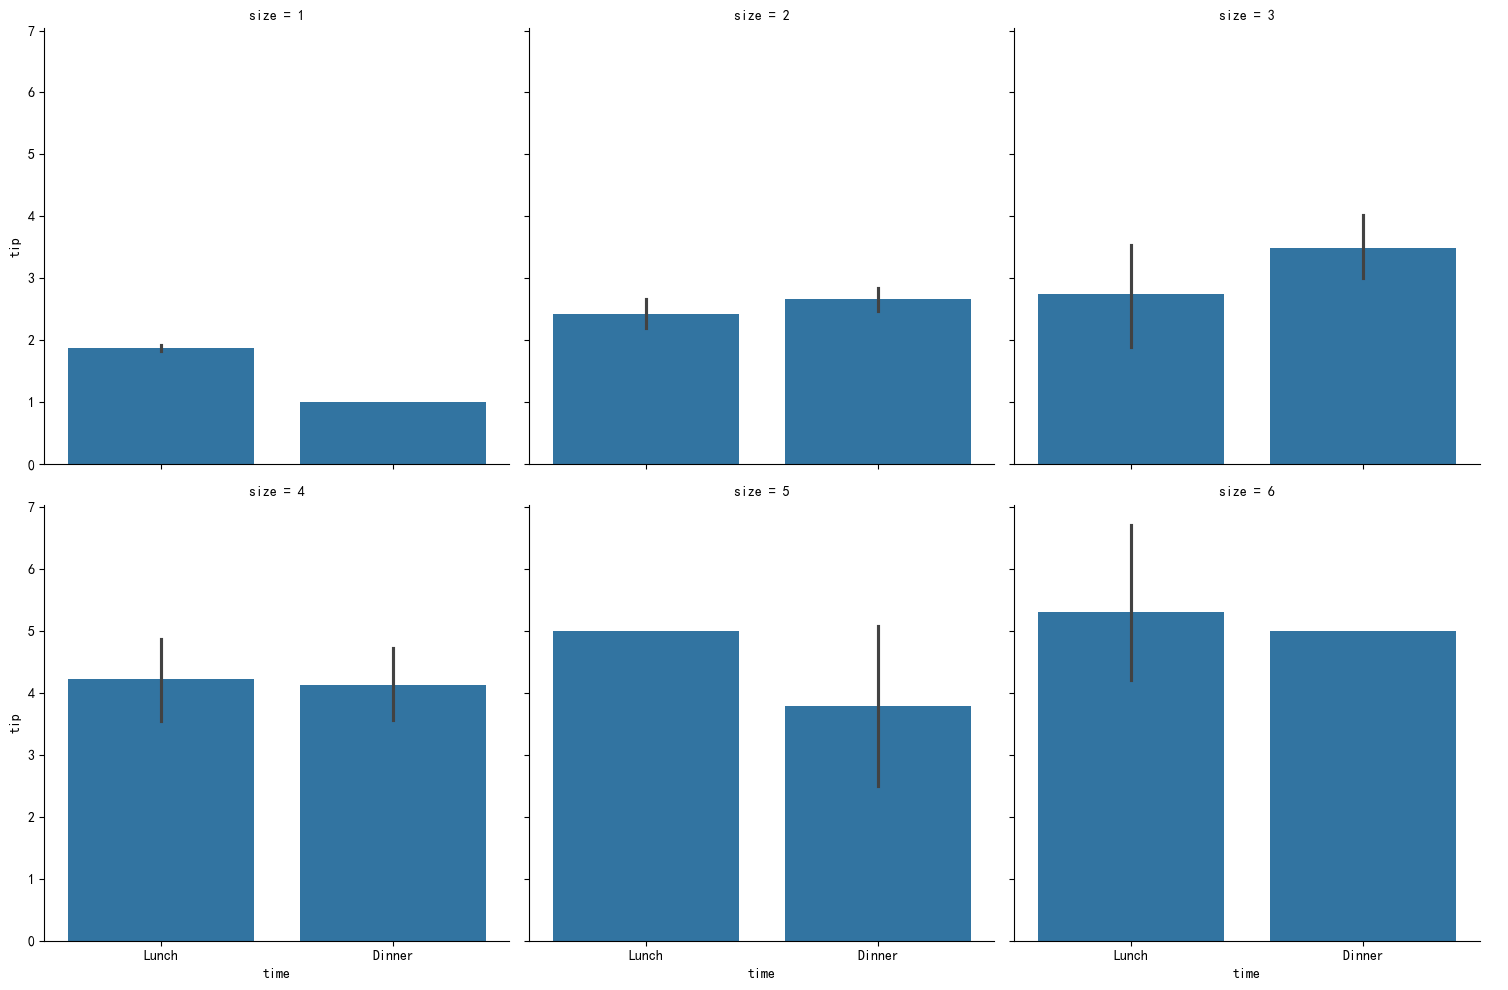

In [ ]:
sns.catplot(data=tip_df, x="time", y="tip", kind="bar", col="size", col_wrap=3)

- 不同类别中数值变量的取值范围

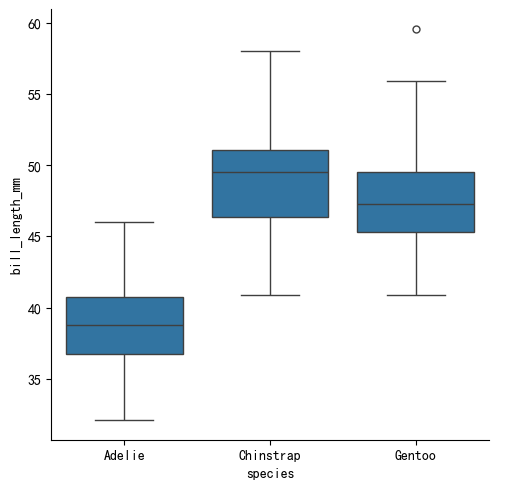

In [ ]:
sns.catplot(data=penguin_df, x="species", y="bill_length_mm", kind="box") # 箱线图

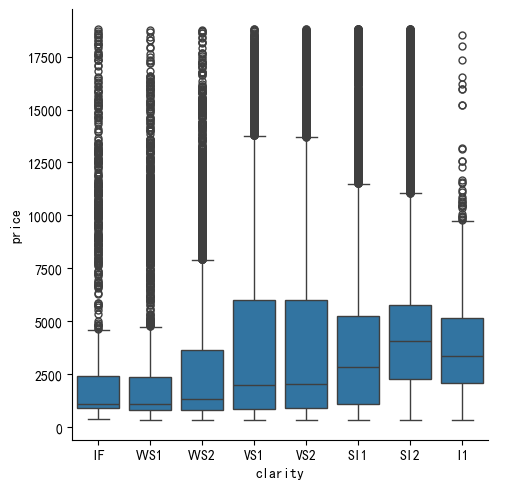

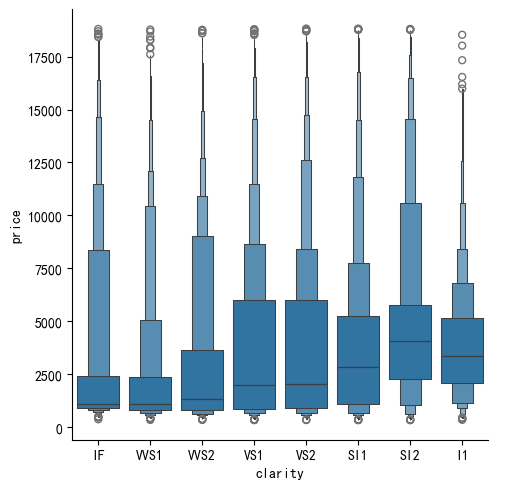

In [ ]:
sns.catplot(data=diamon_df, x="clarity",y="price", kind="box")
sns.catplot(data=diamon_df, x="clarity",y="price", kind="boxen") # 更能展示异常值

- 不同类别中数值变量的分布图

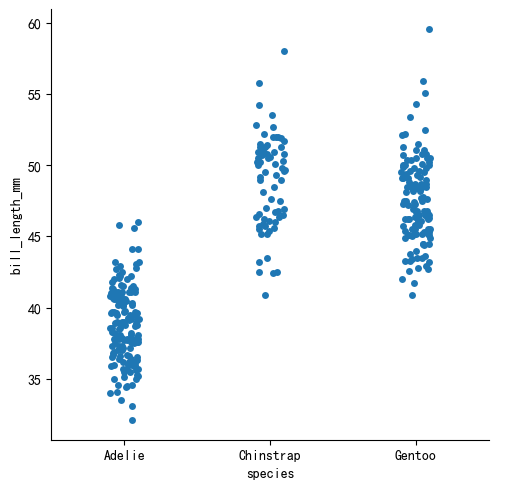

In [102]:
sns.catplot(data=penguin_df, x="species", y="bill_length_mm", kind="strip") # 带状图

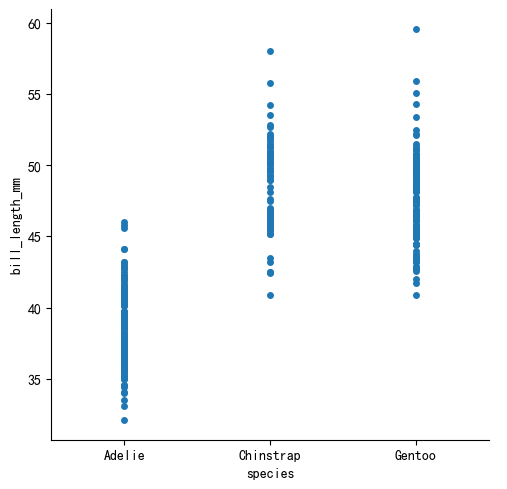

In [ ]:
sns.catplot(data=penguin_df, x="species", y="bill_length_mm", kind="strip", jitter=0) # jitter=0带状绘制成直线，0~1越大越稀疏

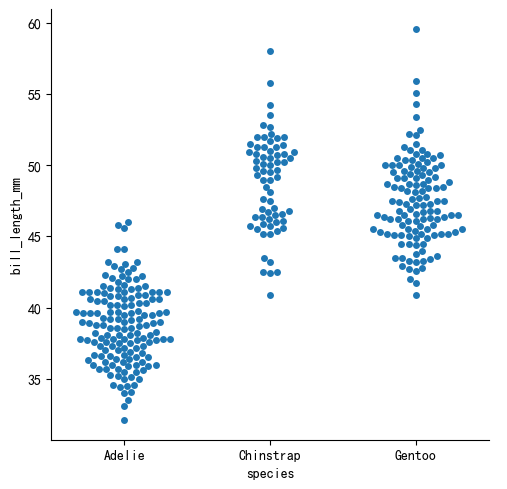

In [103]:
sns.catplot(data=penguin_df, x="species", y="bill_length_mm", kind="swarm") # 分簇散点图

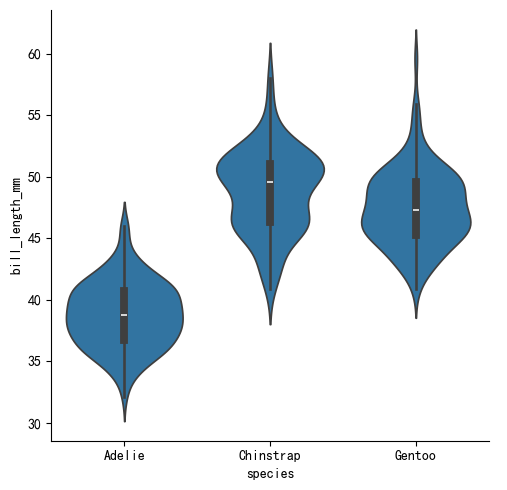

In [ ]:
sns.catplot(data=penguin_df, x="species", y="bill_length_mm", kind="violin") # 小提琴图

- 叠加小提琴图和分簇散点图

<Axes: xlabel='species', ylabel='bill_length_mm'>

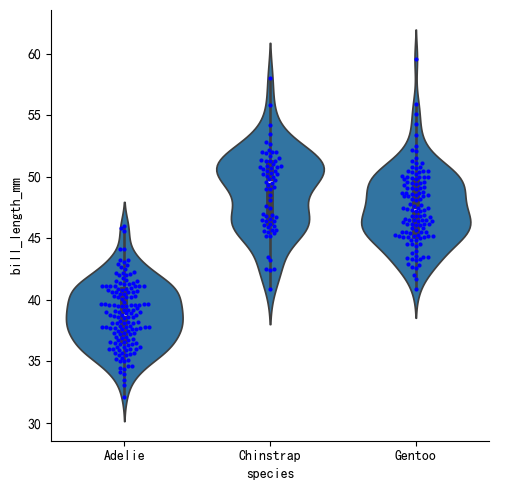

In [ ]:
sns.catplot(data=penguin_df, x="species", y="bill_length_mm", kind="violin")
sns.swarmplot(data=penguin_df, x="species", y="bill_length_mm", color="b", size=3) # 注意为了看清点，设置分簇散点图的颜色

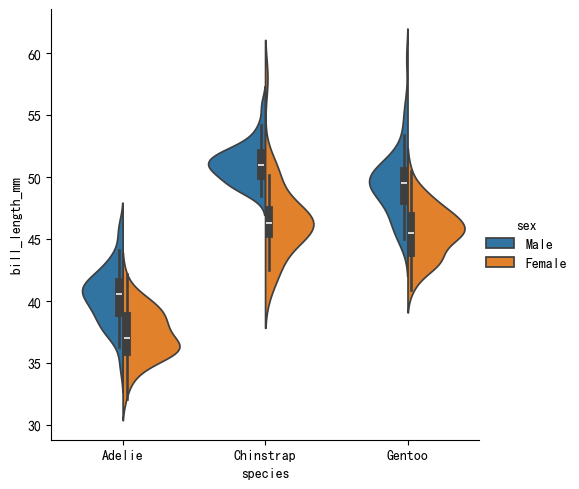

In [ ]:
sns.catplot(data=penguin_df, x="species", y="bill_length_mm", hue="sex", kind="violin", split=True) # split=True合并更节省空间

# 四、自定义绘图函数

- FacetGrid：

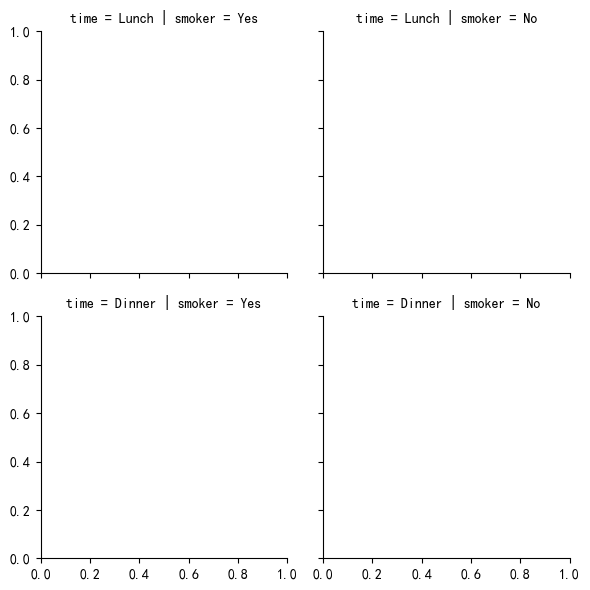

In [ ]:
g = sns.FacetGrid(data=tip_df, row="time", col="smoker") # 自定义绘图区

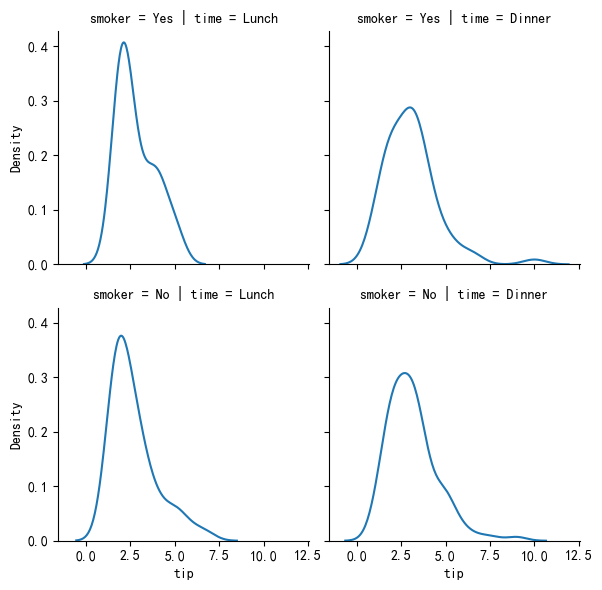

In [ ]:
g = sns.FacetGrid(data=tip_df, row="smoker", col="time") # row和col都应为类别特征
g.map(sns.kdeplot, "tip") # x轴特征

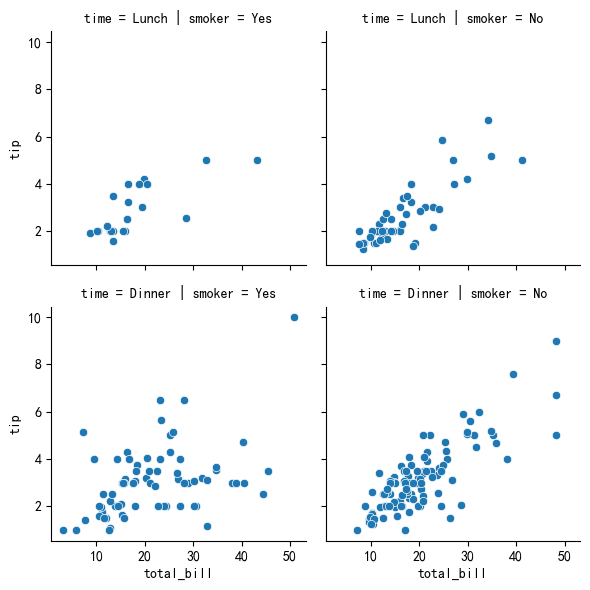

In [ ]:
g=sns.FacetGrid(data=tip_df, row="time", col="smoker")
# 错误：g.map(sns.scatterplot, data=tip_df, x="total_bill", y="tip")
g.map(sns.scatterplot, "total_bill", "tip") # 联合分布

- PairGrid：

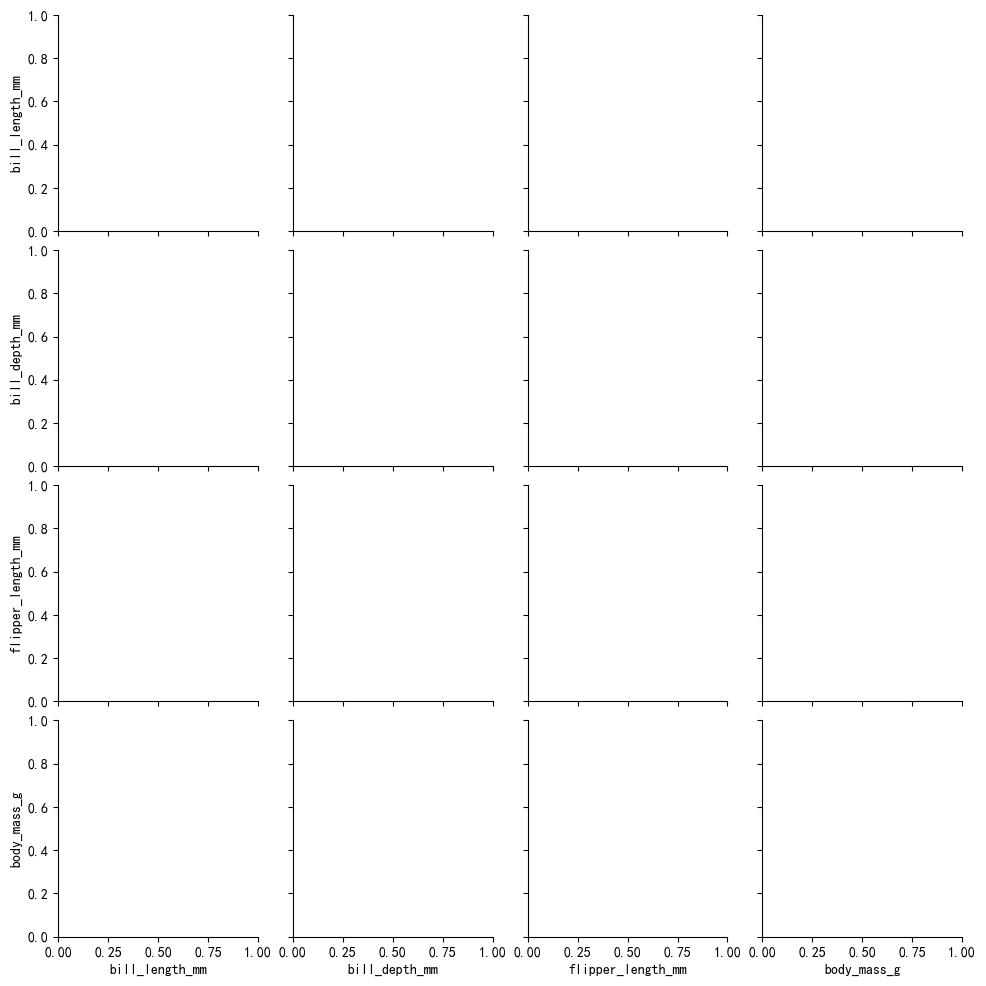

In [ ]:
g = sns.PairGrid(data=penguin_df) # 自定义绘图区

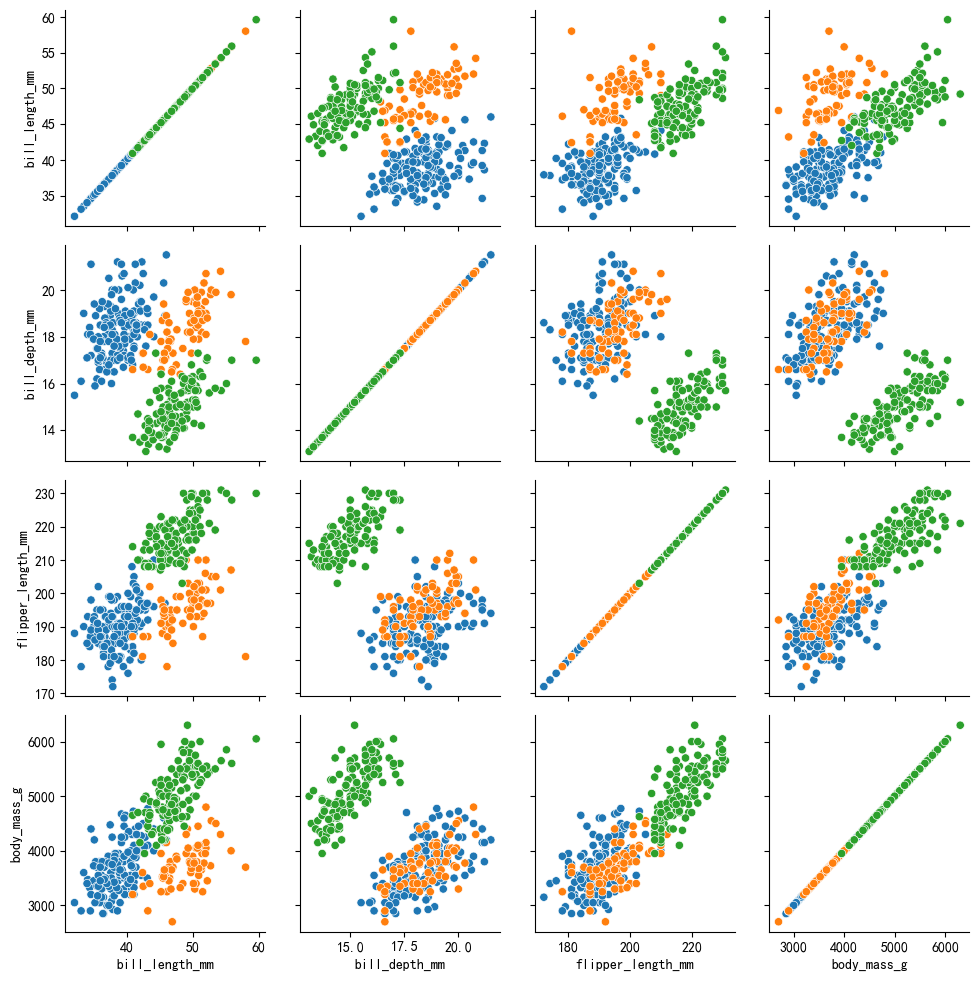

In [ ]:
g = sns.PairGrid(data=penguin_df, hue="species") # 注意：只对数值型特征绘图，可以设定hue来加入类别
g.map(sns.scatterplot)

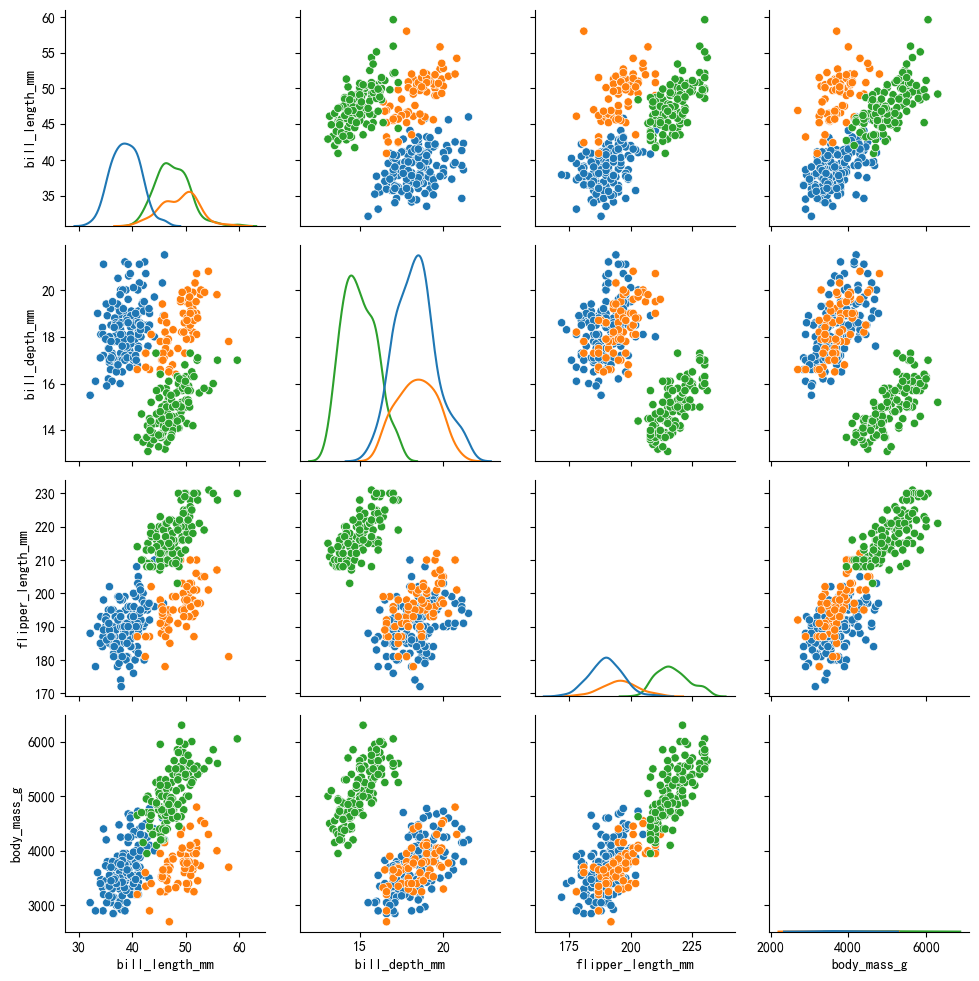

In [ ]:
g = sns.PairGrid(data=penguin_df, hue="species")
g.map_diag(sns.kdeplot) # 对角线
g.map_offdiag(sns.scatterplot) # 非对角线

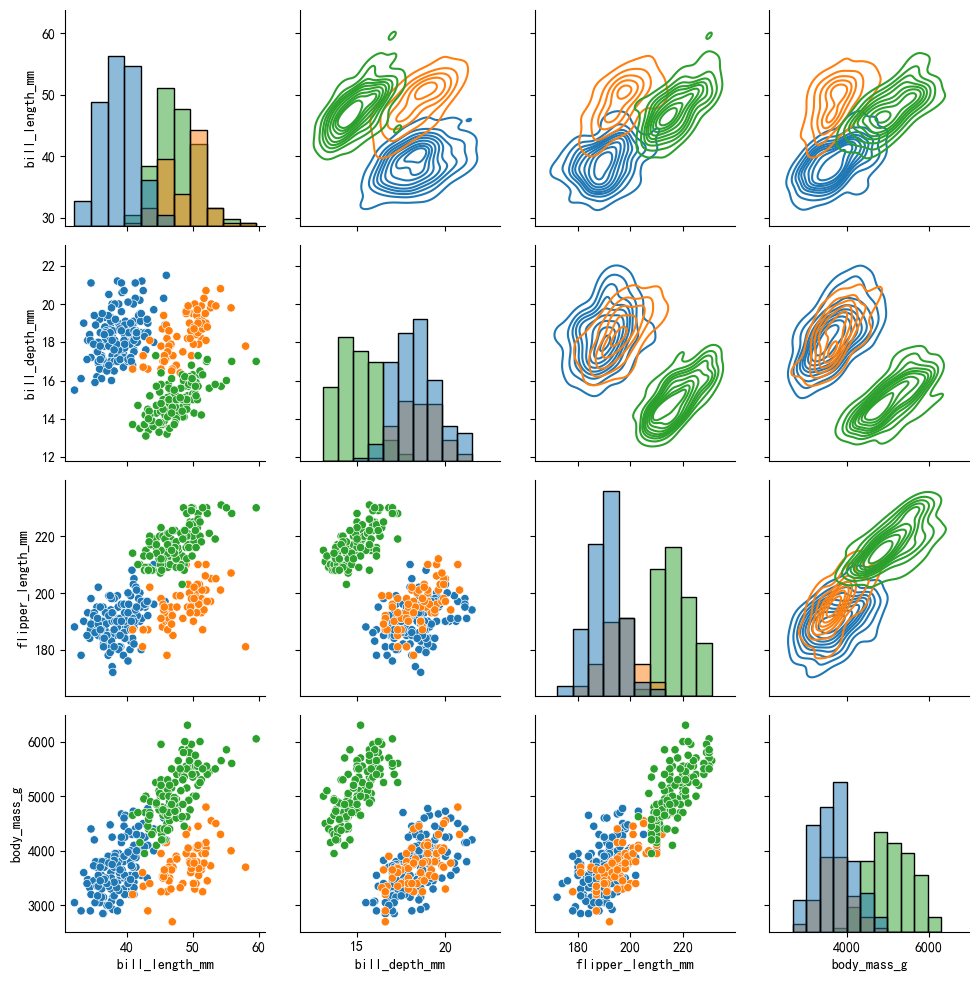

In [ ]:
g=sns.PairGrid(data=penguin_df, hue="species") # 不设置hue：看所有数据分布
g.map_diag(sns.histplot) # 对角线
g.map_upper(sns.kdeplot) # 上三角区域
g.map_lower(sns.scatterplot) # 下三角区域